#### Generating flow fields and dynamic velocity landscapes using fit dynamical systems
Aditya Nair, 2022, Caltech

The following code can reproduce panels from Fig 3 of Nair et al., and provides functions and code to generate flow fields and 3d landscapes from low dimensional dynamical systems

In [15]:
## Helper Functions 

import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.gridspec import GridSpec

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = ["windows blue",
               "red",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "mint",
               "light cyan",
               "steel blue",
               "forest green",
               "pastel purple",
               "salmon",
               "dark brown"]

colors = sns.xkcd_palette(color_names)

import ssm
from ssm.util import random_rotation
from ssm.plots import plot_dynamics_2d

# Specify whether or not to save figures
save_figures = False

In [19]:
##  Set the parameters of the LDS
time_bins = 200   # number of time bins
state_dim = 2     # number of latent dimensions
obs_dim = 10      # number of observed dimensions

In [20]:
## Make an LDS with a defined matrix A
lds_point = ssm.LDS(obs_dim, state_dim, emissions="gaussian_orthog")

s = (2,2)
A1 = np.zeros(s)
A1[1][1] = -1
A1[0][0] = -1
b = np.zeros(state_dim)

# Set the dynamics matrix (A)  
lds_point.dynamics.A = A1
lds_point.dynamics.b = b

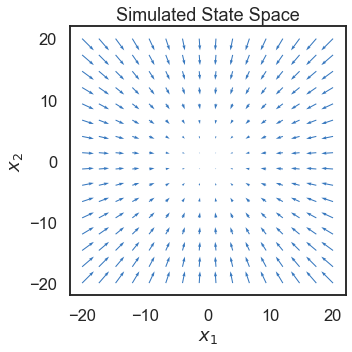

In [22]:
# Sample from the LDS object: Point Attractor
A1[1][1] = -1
A1[0][0] = -1

states, emissions = lds_point.sample(time_bins)
plt.figure(figsize=(5,5))

# Plot the dynamics vector field
q = plot_dynamics_2d(A1, 
                     bias_vector=b,
                     mins=np.array([-20,-20]),
                     maxs=np.array([20,20]),
                     npts=16,
                     color=colors[0])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Simulated State Space")
plt.tight_layout()


<Figure size 360x360 with 0 Axes>

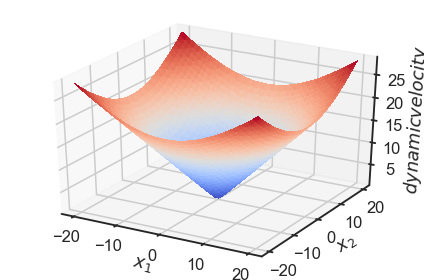

In [34]:
# Create 3D surface (dynamic velocity landscape) for a point attractor

%matplotlib inline 

from matplotlib import cm

model = true_lds
xlim=(-20, 20)
ylim=(-20, 20)
nxpts=40
nypts=40
alpha=0.8
ax=None
figsize=(5, 5)

# Create a grid of x, y values
x = np.linspace(*xlim, nxpts)
y = np.linspace(*ylim, nypts)
X, Y = np.meshgrid(x, y)
xy = np.column_stack((X.ravel(), Y.ravel()))

if ax is None:
    fig = plt.figure(figsize=figsize)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

dxydt_m = (xy).dot((model.dynamics.As).T)
dxydt_m_norm = np.zeros((len(dxydt_m)))

for xt in range(0,len(dxydt_m)): 
    dxydt_m_norm[xt] = np.linalg.norm(dxydt_m[xt,:])

ax.plot_trisurf(xy[:, 0], xy[:, 1], dxydt_m_norm, cmap=cm.coolwarm,
              linewidth=0, antialiased=False)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$ dynamic velocity$')

plt.tight_layout()



array([[  0.,   0.],
       [  0., -10.]])

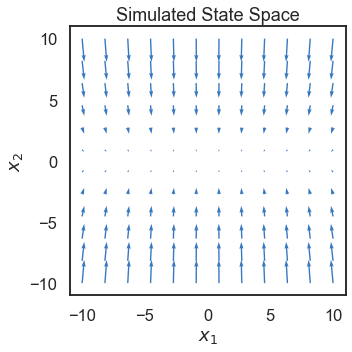

In [76]:
# Sample from the LDS object: line attractor
lds_line = ssm.LDS(obs_dim, state_dim, emissions="gaussian")

A1 = np.zeros(s)
A1[1][1] = -10
A1[0][0] = 0
b = np.zeros(state_dim)


lds_line.dynamics.A = A1
lds_line.dynamics.b = b

states, emissions = lds_line.sample(time_bins)
plt.figure(figsize=(5,5))

# Plot the dynamics vector field
q = plot_dynamics_2d(A1, 
                     bias_vector=b,
                     mins=np.array([-10,-10]),
                     maxs=np.array([10,10]),
                     npts=12,
                     color=colors[0])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Simulated State Space")
plt.tight_layout()


<Figure size 360x360 with 0 Axes>

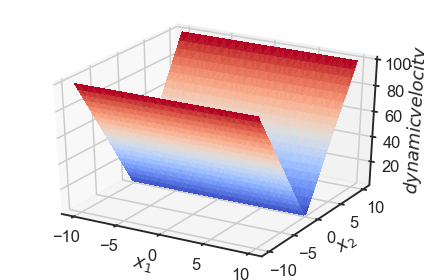

In [77]:
# Create 3D surface (dynamic velocity landscape) for a line attractor

%matplotlib inline 

from matplotlib import cm

model = lds_line
xlim=(-10, 10)
ylim=(-10, 10)
nxpts=40
nypts=40
alpha=0.8
ax=None
figsize=(5, 5)

# Create a grid of x, y values
x = np.linspace(*xlim, nxpts)
y = np.linspace(*ylim, nypts)
X, Y = np.meshgrid(x, y)
xy = np.column_stack((X.ravel(), Y.ravel()))

if ax is None:
    fig = plt.figure(figsize=figsize)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

dxydt_m = (xy).dot((model.dynamics.As).T)
dxydt_m_norm = np.zeros((len(dxydt_m)))

for xt in range(0,len(dxydt_m)): 
    dxydt_m_norm[xt] = np.linalg.norm(dxydt_m[xt,:])

ax.plot_trisurf(xy[:, 0], xy[:, 1], dxydt_m_norm, cmap=cm.coolwarm,
              linewidth=0, antialiased=False)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$ dynamic velocity$')

plt.tight_layout()

